In [2]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
twt_alevie = pd.read_csv('..//db//twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232
...,...,...,...,...,...
252,2022년 3월 16일,Aaron Levie@levie,Welcome to the new economy,8,108
253,2022년 3월 13일,Aaron Levie@levie,I’m a single issue voter: time should not just...,76,1.2천
254,2022년 3월 11일,Aaron Levie@levie,There are few joys in life like playing with f...,19,250
255,2022년 3월 10일,Aaron Levie@levie,https://finance.yahoo.com/news/mast-j-germe...,1,36


In [4]:
twt_list = twt_alevie['content'].values 

In [5]:
twt_list = twt_list.tolist()
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [6]:
twt_list = list(map(str,twt_list)) # 리스트 원소들 문자열로 변환
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [7]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['For',
  'context',
  ',',
  'Netflix',
  'could',
  'ship',
  'you',
  'their',
  'entire',
  'film',
  'catalog',
  'on',
  'a',
  'single',
  'disc',
  '.'],
 ['Startups',
  'tend',
  'to',
  'win',
  'in',
  'spaces',
  'where',
  'the',
  'incumbent',
  'can',
  'not',
  'respond',
  'effectively',
  'due',
  'to',
  'organizational',
  ',',
  'business',
  'model',
  ',',
  'or',
  'brand',
  'reasons',
  '.',
  'Perhaps',
  'the',
  'fact',
  'that',
  'AI',
  'has',
  'a',
  'long',
  'tail',
  'of',
  'brand',
  'risks',
  'and',
  'organizational',
  'dilemmas',
  'in',
  'resolving',
  'them',
  ',',
  'we',
  '’',
  'll',
  'see',
  'more',
  'startup-led',
  'disruption',
  '.'],
 ['People',
  '’',
  's',
  'understanding',
  'of',
  'business',
  'is',
  'funny',
  '.',
  'Being',
  '*',
  'unprofitable',
  '*',
  'is',
  'a',
  'far',
  'faster',
  'way',
  'to',
  'have',
  'a',
  'site',
  'run',
  'into',
  'the',
  'ground',
  '.'],
 ['How',
  'could',
  'you',
  '

In [8]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc'], ['startups', 'tend', 'win', 'spaces', 'incumbent', 'respond', 'effectively', 'due', 'organizational', 'business', 'model', 'brand', 'reasons', 'perhaps', 'fact', 'ai', 'long', 'tail', 'brand', 'risks', 'organizational', 'dilemmas', 'resolving', 'startup-led', 'disruption'], ['people', 'understanding', 'business', 'funny', 'being', 'unprofitable', 'faster', 'site', 'run', 'ground'], ['how', 'passionately', 'hate'], ['we', 'beta', 'testing', 'ai', 'feature', 'internally', 'box', 'concept', 'brainstormed', '5', 'years', 'ago', 'literally', 'impossible', 'pull', 'back', 'pretty', 'remarkable', 'possible', 'solve', 'ai'], ['the', 'job', 'founder', 'taking', 'offhand', 'comment', 'made', 'meeting', '7', 'seconds', 'pivoting', 'business', 'model'], ['this', 'demo', 'insane', 'try', 'http', '//retellai.com'], ['given', 'incentives', 'public', 'cloud', 'providers', 'bring', 'workloads', 'possible', 'inevitabl

In [9]:
from nltk.corpus import wordnet
from collections import defaultdict

def assign_category(word):
    try:
        categories = ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']
        max_similarity = -1  # 초기값 설정
        assigned_category = None
        
        for category in categories:
            synsets = wordnet.synsets(category)
            for synset in synsets:
                similarity = synset.path_similarity(wordnet.synsets(word)[0]) if wordnet.synsets(word) else None
                if similarity and similarity > max_similarity:
                    max_similarity = similarity
                    assigned_category = category
        return assigned_category
    except IndexError:
        return None

def assign_categories_to_sentence(sentence_tokens):
    category_counts = defaultdict(int)
    
    for word in sentence_tokens:
        category = assign_category(word)
        if category:
            category_counts[category] += 1
    
    if category_counts:
        # 가장 많이 할당된 카테고리 반환
        assigned_category = max(category_counts, key=category_counts.get)
        return assigned_category, category_counts[assigned_category]
    else:
        return None

# 테스트
sentence_tokens = ['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']
assigned_category = assign_categories_to_sentence(sentence_tokens)
print(f"입력된 문장의 토큰 '{sentence_tokens}'에 대한 연관성이 가장 높은 카테고리: {assigned_category}")


입력된 문장의 토큰 '['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']'에 대한 연관성이 가장 높은 카테고리: ('product', 4)


In [10]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
topic_conv_list

[{'word': ['for',
   'context',
   'netflix',
   'ship',
   'entire',
   'film',
   'catalog',
   'single',
   'disc'],
  'topic': 'product'},
 {'word': ['startups',
   'tend',
   'win',
   'spaces',
   'incumbent',
   'respond',
   'effectively',
   'due',
   'organizational',
   'business',
   'model',
   'brand',
   'reasons',
   'perhaps',
   'fact',
   'ai',
   'long',
   'tail',
   'brand',
   'risks',
   'organizational',
   'dilemmas',
   'resolving',
   'startup-led',
   'disruption'],
  'topic': 'social'},
 {'word': ['people',
   'understanding',
   'business',
   'funny',
   'being',
   'unprofitable',
   'faster',
   'site',
   'run',
   'ground'],
  'topic': 'business'},
 {'word': ['how', 'passionately', 'hate'], 'topic': 'social'},
 {'word': ['we',
   'beta',
   'testing',
   'ai',
   'feature',
   'internally',
   'box',
   'concept',
   'brainstormed',
   '5',
   'years',
   'ago',
   'literally',
   'impossible',
   'pull',
   'back',
   'pretty',
   'remarkable',
   '

In [11]:
# 트윗의 카테고리 카운트
topic_conv_list = pd.DataFrame(topic_conv_list)
df = topic_conv_list['topic'].value_counts()
df

topic
business       100
social          88
product         23
company         20
emotion          8
environment      5
politics         4
general          3
innovation       1
technology       1
Name: count, dtype: int64

In [12]:
df.values.tolist()

[100, 88, 23, 20, 8, 5, 4, 3, 1, 1]

In [13]:
df.index.tolist()

['business',
 'social',
 'product',
 'company',
 'emotion',
 'environment',
 'politics',
 'general',
 'innovation',
 'technology']

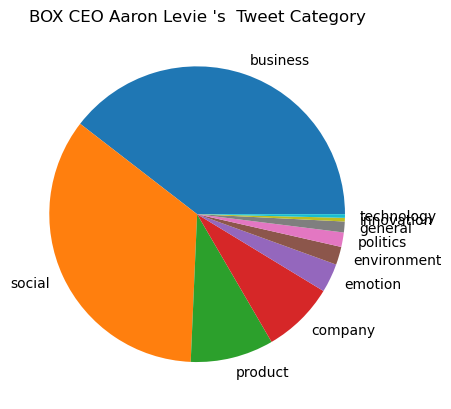

In [14]:
import matplotlib.pyplot as plt

plt.pie(df.values.tolist(),labels=df.index.tolist() )
plt.title("BOX CEO Aaron Levie 's  Tweet Category")
plt.show()

감성분석

In [15]:
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import os
plt.style.use('fivethirtyeight')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\imim0\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()

In [17]:
from textblob import TextBlob


twt_df_copy = twt_alevie.copy()
twt_df_copy['content'] = twt_df_copy['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_df_copy['Subjectivity'] = twt_df_copy['content'].apply(getSubjectivity)
twt_df_copy['Polarity'] = twt_df_copy['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_df_copy['Analysis'] = twt_df_copy['Polarity'].apply(getAnalysis)

twt_df_copy.head()

,dates,ID,content,rt,like,Subjectivity,Polarity,Analysis
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434,0.419643,-0.035714,0
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894,0.418750,0.281250,2
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251,1.000000,0.175000,2
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607,0.550000,-0.300000,0
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232,0.625000,0.055556,2


In [18]:
twt_df_copy['Analysis'].value_counts()

Analysis
2    138
1     73
0     46
Name: count, dtype: int64

In [19]:
twt_df_copy['Analysis'].value_counts().values.tolist()

[138, 73, 46]

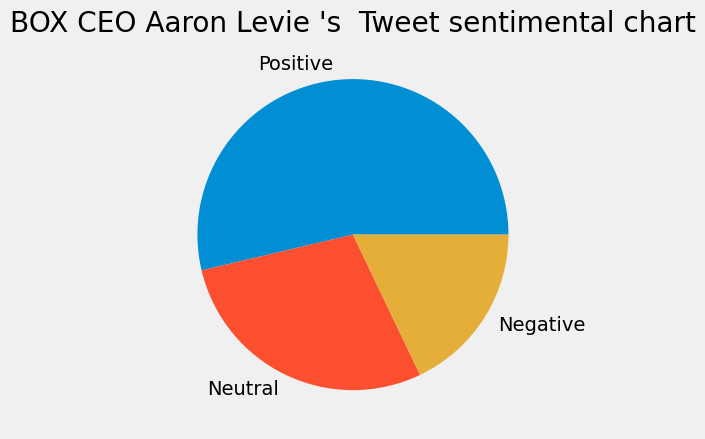

In [20]:
plt.pie(twt_df_copy['Analysis'].value_counts().values.tolist(), labels=['Positive', 'Neutral', 'Negative'])
plt.title("BOX CEO Aaron Levie 's  Tweet sentimental chart")
plt.show()

딥러닝 BERT

In [21]:
# 입력요소
# 트윗의 주제, subjectivity(주관성점수; 의견이 주관적인 생각인지 객관적인 내용인지), 감성지수, 리트윗수, 좋아요수

# 출력할 예측요소
# 양수
# 음수
# 전날 음수값 대비 절대값 작은경우 ( 감소폭이 줄어들었을때)
# 전날 음수값 대비 절대값 큰 경우
# 전날 양수값 대비 작은경우
# 전날 양수값 대비 큰 경우

# lstm



In [22]:
twt_alevie = pd.read_csv('..//db//new_set//twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
227,2024-02-23,Aaron Levie@levie,We’re beta testing an AI feature internally at...,38,229
228,2024-02-24,Aaron Levie@levie,How could you passionately hate people this much.,71,607
229,2024-02-24,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
230,2024-02-25,Aaron Levie@levie,Startups tend to win in spaces where the incum...,164,897


In [23]:
twt_abch = pd.read_csv('..//db//new_set//twt_abch.csv')
twt_bill = pd.read_csv('..//db//new_set//twt_bill.csv')
twt_carl = pd.read_csv('..//db//new_set//twt_carl.csv')
twt_elon1 = pd.read_csv('..//db//new_set//twt_elon1.csv')
twt_elon2 = pd.read_csv('..//db//new_set//twt_elon2.csv')
twt_elon3 = pd.read_csv('..//db//new_set//twt_elon3.csv')
twt_elon4 = pd.read_csv('..//db//new_set//twt_elon4.csv')
twt_elon5 = pd.read_csv('..//db//new_set//twt_elon5.csv')
twt_elon6 = pd.read_csv('..//db//new_set//twt_elon6.csv')
twt_elon7 = pd.read_csv('..//db//new_set//twt_elon7.csv')
twt_elon8 = pd.read_csv('..//db//new_set//twt_elon8.csv')
twt_john1 = pd.read_csv('..//db//new_set//twt_john1.csv')
twt_john2 = pd.read_csv('..//db//new_set//twt_john2.csv')
twt_john3 = pd.read_csv('..//db//new_set//twt_john3.csv')
twt_lisasu = pd.read_csv('..//db//new_set//twt_lisasu.csv')
twt_reed = pd.read_csv('..//db//new_set//twt_reed.csv')
twt_richard = pd.read_csv('..//db//new_set//twt_richard.csv')
twt_tim1 = pd.read_csv('..//db//new_set//twt_tim1.csv')
twt_tim2 = pd.read_csv('..//db//new_set//twt_tim2.csv')


In [24]:
twt_merge = pd.concat([twt_alevie, twt_abch, twt_bill, twt_carl, twt_elon1, twt_elon2, twt_elon3, twt_elon4, twt_elon5, twt_elon6, twt_elon7, twt_elon8, twt_john1, twt_john2, twt_john3, twt_lisasu, twt_reed, twt_richard, twt_tim1, twt_tim2])
twt_merge

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,Tim Cook@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,Tim Cook@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,Tim Cook@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,Tim Cook@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [25]:
twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 55
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dates    2128 non-null   object
 1   ID       2128 non-null   object
 2   content  2111 non-null   object
 3   rt       2106 non-null   object
 4   like     2128 non-null   object
dtypes: object(5)
memory usage: 99.8+ KB


In [26]:
twt_merge['dates'] = pd.to_datetime(twt_merge['dates'])

In [27]:
twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 55
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dates    2128 non-null   datetime64[ns]
 1   ID       2128 non-null   object        
 2   content  2111 non-null   object        
 3   rt       2106 non-null   object        
 4   like     2128 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 99.8+ KB


In [28]:
stock = pd.read_csv('..//crawling//stock_merge_df.csv')
stock

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff
0,2019-03-11,@reedhastings,352.000000,358.980011,350.029999,358.859985,358.859985,5387300,NaN
1,2019-03-12,@reedhastings,359.369995,360.130005,353.799988,356.269989,356.269989,5164600,-2.589996
2,2019-03-13,@reedhastings,355.809998,362.480011,352.769989,361.209991,361.209991,6444100,4.940002
3,2019-03-14,@reedhastings,360.500000,363.839996,358.100006,358.820007,358.820007,5271400,-2.389984
4,2019-03-15,@reedhastings,361.019989,364.000000,358.890015,361.459991,361.459991,8444500,2.639984
...,...,...,...,...,...,...,...,...,...
12140,2024-03-04,@bchesky,159.899994,163.014999,157.929993,158.089996,158.089996,4403200,-1.630005
12141,2024-03-05,@bchesky,157.199997,159.979996,156.139999,159.330002,159.330002,4714300,1.240006
12142,2024-03-06,@bchesky,160.100006,164.589996,160.070007,163.869995,163.869995,5167900,4.539993
12143,2024-03-07,@bchesky,165.000000,165.384995,162.240005,163.539993,163.539993,3810300,-0.330002


In [29]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12145 non-null  object 
 1   name           12145 non-null  object 
 2   Open           12145 non-null  float64
 3   High           12145 non-null  float64
 4   Low            12145 non-null  float64
 5   Close          12145 non-null  float64
 6   AdjClose       12145 non-null  float64
 7   Volume         12145 non-null  int64  
 8   adjClose_diff  12135 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 854.1+ KB


In [30]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           12145 non-null  datetime64[ns]
 1   name           12145 non-null  object        
 2   Open           12145 non-null  float64       
 3   High           12145 non-null  float64       
 4   Low            12145 non-null  float64       
 5   Close          12145 non-null  float64       
 6   AdjClose       12145 non-null  float64       
 7   Volume         12145 non-null  int64         
 8   adjClose_diff  12135 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 854.1+ KB


In [31]:
twt_merge = twt_merge.rename(columns={'dates': 'Date', 'ID': 'name'})
twt_merge

,Date,name,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,Tim Cook@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,Tim Cook@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,Tim Cook@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,Tim Cook@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [32]:
twt_merge['name'] = twt_merge['name'].str.split('@').str[1].apply(lambda x: '@' + x) # 골뱅이 기준 오른쪽 글자만 남기고 앞에 골뱅이 붙여주기
twt_merge
 

,Date,name,content,rt,like
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,@levie,Amazing quote:,9,196
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [33]:
df = pd.merge(stock, twt_merge, on=['Date', 'name'], how='outer')
df

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2019-03-11,@BillGates,110.989998,112.949997,110.980003,112.830002,107.402000,26491600.0,NaN,NaN,NaN,NaN
1,2019-03-11,@Carl_C_Icahn,70.250000,72.419998,70.040001,72.370003,33.131168,79200.0,NaN,NaN,NaN,NaN
2,2019-03-11,@JohnLegere,70.830002,71.580002,70.410004,71.470001,70.876991,2493100.0,NaN,NaN,NaN,NaN
3,2019-03-11,@LisaSu,22.150000,23.080000,21.980000,22.959999,22.959999,54420200.0,NaN,NaN,NaN,NaN
4,2019-03-11,@elonmusk,18.901333,19.418667,18.700001,19.394667,19.394667,110884500.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13623,2024-03-08,@elonmusk,181.500000,182.729996,174.699997,175.339996,175.339996,85315300.0,-3.309998,NaN,NaN,NaN
13624,2024-03-08,@levie,29.830000,30.170000,29.590000,29.629999,29.629999,3407800.0,-0.110001,NaN,NaN,NaN
13625,2024-03-08,@reedhastings,608.270020,616.090027,600.840027,604.820007,604.820007,2774600.0,-3.690003,NaN,NaN,NaN
13626,2024-03-08,@richardbranson,1.730000,1.830000,1.710000,1.720000,1.720000,9215700.0,0.000000,NaN,NaN,NaN


In [34]:
df.to_csv('final_df.csv', index=False)

In [35]:
twt_list = twt_merge['content'].values 
twt_list = twt_list.tolist()
twt_list

['This needs to be turned into a buddy comedy ASAP.',
 'The cool thing about naming a company Box is all the interesting news articles you get in your feed.',
 'Amazing quote:',
 'Some say innovation is dead, but how can that be if Twitter just rolled out the ability to search through DMs.',
 'The challenge with taxing unrealized gains is you can force selling or borrowing against assets at inopportune times, which can easily lead to systemic risk, volatility, or lack of long-term investing in the markets over time. Only bad scenarios. There must be another way.',
 'Remember: customers rarely care about how novel your technology is, only what problems it solves for them. Never lose sight of that as a startup.',
 'It is so frustrating that a few hundred people in DC are squandering our economic future.',
 'Honestly congrats to the web3 crowd for utterly confusing politicians ',
 'I have to admit, when we started Box we didn’t imagine one of the use cases would be Cardi B using it to com

In [36]:
twt_list = list(map(str,twt_list))

In [37]:
# df['content'].isnull().value_counts() # content null개수 11517개


In [38]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['This',
  'needs',
  'to',
  'be',
  'turned',
  'into',
  'a',
  'buddy',
  'comedy',
  'ASAP',
  '.'],
 ['The',
  'cool',
  'thing',
  'about',
  'naming',
  'a',
  'company',
  'Box',
  'is',
  'all',
  'the',
  'interesting',
  'news',
  'articles',
  'you',
  'get',
  'in',
  'your',
  'feed',
  '.'],
 ['Amazing', 'quote', ':'],
 ['Some',
  'say',
  'innovation',
  'is',
  'dead',
  ',',
  'but',
  'how',
  'can',
  'that',
  'be',
  'if',
  'Twitter',
  'just',
  'rolled',
  'out',
  'the',
  'ability',
  'to',
  'search',
  'through',
  'DMs',
  '.'],
 ['The',
  'challenge',
  'with',
  'taxing',
  'unrealized',
  'gains',
  'is',
  'you',
  'can',
  'force',
  'selling',
  'or',
  'borrowing',
  'against',
  'assets',
  'at',
  'inopportune',
  'times',
  ',',
  'which',
  'can',
  'easily',
  'lead',
  'to',
  'systemic',
  'risk',
  ',',
  'volatility',
  ',',
  'or',
  'lack',
  'of',
  'long-term',
  'investing',
  'in',
  'the',
  'markets',
  'over',
  'time',
  '.',
  

In [39]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['this', 'turned', 'buddy', 'comedy', 'asap'], ['the', 'cool', 'naming', 'company', 'box', 'interesting', 'news', 'articles', 'feed'], ['amazing', 'quote'], ['some', 'innovation', 'dead', 'twitter', 'rolled', 'ability', 'search', 'dms'], ['the', 'challenge', 'taxing', 'unrealized', 'gains', 'force', 'selling', 'borrowing', 'assets', 'inopportune', 'times', 'easily', 'lead', 'systemic', 'risk', 'volatility', 'lack', 'long-term', 'investing', 'markets', 'time', 'only', 'scenarios', 'there'], ['remember', 'customers', 'rarely', 'technology', 'problems', 'solves', 'never', 'lose', 'sight', 'startup'], ['it', 'frustrating', 'hundred', 'dc', 'squandering', 'economic', 'future'], ['honestly', 'congrats', 'web3', 'crowd', 'utterly', 'confusing', 'politicians'], ['i', 'admit', 'started', 'box', 'imagine', 'cases', 'cardi', 'b', 'receipts'], ['just', 'remember', 'scale', 'consumers', 'generally', 'choose', 'simpler', 'software', 'successfully', 'perform', 'task', 'hand', 'if', 'technical', 'com

In [40]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
topic_conv_list

[{'word': ['this', 'turned', 'buddy', 'comedy', 'asap'], 'topic': 'social'},
 {'word': ['the',
   'cool',
   'naming',
   'company',
   'box',
   'interesting',
   'news',
   'articles',
   'feed'],
  'topic': 'business'},
 {'word': ['amazing', 'quote'], 'topic': 'social'},
 {'word': ['some',
   'innovation',
   'dead',
   'twitter',
   'rolled',
   'ability',
   'search',
   'dms'],
  'topic': 'business'},
 {'word': ['the',
   'challenge',
   'taxing',
   'unrealized',
   'gains',
   'force',
   'selling',
   'borrowing',
   'assets',
   'inopportune',
   'times',
   'easily',
   'lead',
   'systemic',
   'risk',
   'volatility',
   'lack',
   'long-term',
   'investing',
   'markets',
   'time',
   'only',
   'scenarios',
   'there'],
  'topic': 'business'},
 {'word': ['remember',
   'customers',
   'rarely',
   'technology',
   'problems',
   'solves',
   'never',
   'lose',
   'sight',
   'startup'],
  'topic': 'social'},
 {'word': ['it',
   'frustrating',
   'hundred',
   'dc',
  

In [41]:
topic_df = pd.DataFrame(topic_conv_list)
topic_df

,word,topic
0,"[this, turned, buddy, comedy, asap]",social
1,"[the, cool, naming, company, box, interesting,...",business
2,"[amazing, quote]",social
3,"[some, innovation, dead, twitter, rolled, abil...",business
4,"[the, challenge, taxing, unrealized, gains, fo...",business
...,...,...
2092,"[we, wait, bring, mls, season, pass, fans, wor...",business
2093,"[dr., king, ``, we, human, progress, rolls, wh...",company
2094,"[the, meet, macbook, pro, mac, mini, newest, a...",product
2095,"[the, generation, homepod, delivers, rich, dee...",business


In [42]:
twt_merge

,Date,name,content,rt,like
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,@levie,Amazing quote:,9,196
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [43]:
twt_merge = twt_merge.reset_index(drop=True) # 인덱스 초기화 

In [44]:
twt_merge2 = pd.concat([twt_merge, topic_df], axis=1)
twt_merge2

,Date,name,content,rt,like,word,topic
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416,"[this, turned, buddy, comedy, asap]",social
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131,"[the, cool, naming, company, box, interesting,...",business
2,2022-03-24,@levie,Amazing quote:,9,196,"[amazing, quote]",social
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580,"[some, innovation, dead, twitter, rolled, abil...",business
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K,"[the, challenge, taxing, unrealized, gains, fo...",business
...,...,...,...,...,...,...,...
2123,2023-01-12,@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K,NaN,NaN
2124,2023-01-16,@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K,NaN,NaN
2125,2023-01-17,@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K,NaN,NaN
2126,2023-01-18,@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K,NaN,NaN


In [45]:
print(twt_merge2.iloc[2095:2100]) # ???????????

           Date       name                                            content  \
2095 2022-09-07  @tim_cook  It was a great day at Apple Park, introducing ...   
2096 2022-09-08  @tim_cook  Here’s all the big news from the Apple Event. ...   
2097 2022-09-08  @tim_cook  Steve’s legacy lives on in the company we are ...   
2098 2022-09-08  @tim_cook  There is nothing more noble than to devote you...   
2099 2022-09-13  @tim_cook  There must be magic on the pitch at @AFCRichmo...   

        rt  like                                               word     topic  
2095  2.1K   19K  [the, generation, homepod, delivers, rich, dee...  business  
2096  2.3K   15K  [wishing, celebrating, lunar, new, year, healt...    social  
2097  1.7K  8.8K                                                NaN       NaN  
2098  3.8K   36K                                                NaN       NaN  
2099   483  6.7K                                                NaN       NaN  


In [46]:
from textblob import TextBlob


twt_merge22 = twt_merge2.copy()
twt_merge22['content'] = twt_merge22['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_merge22['Subjectivity'] = twt_merge22['content'].apply(getSubjectivity)
twt_merge22['Polarity'] = twt_merge22['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_merge22['Analysis'] = twt_merge22['Polarity'].apply(getAnalysis)

twt_merge22.head()

,Date,name,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416,"[this, turned, buddy, comedy, asap]",social,0.000000,0.000000,1
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131,"[the, cool, naming, company, box, interesting,...",business,0.575000,0.425000,2
2,2022-03-24,@levie,Amazing quote:,9,196,"[amazing, quote]",social,0.900000,0.600000,2
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580,"[some, innovation, dead, twitter, rolled, abil...",business,0.400000,-0.200000,0
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K,"[the, challenge, taxing, unrealized, gains, fo...",business,0.833333,-0.088889,0


In [47]:
twt_merge22

,Date,name,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416,"[this, turned, buddy, comedy, asap]",social,0.000000,0.000000,1
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131,"[the, cool, naming, company, box, interesting,...",business,0.575000,0.425000,2
2,2022-03-24,@levie,Amazing quote:,9,196,"[amazing, quote]",social,0.900000,0.600000,2
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580,"[some, innovation, dead, twitter, rolled, abil...",business,0.400000,-0.200000,0
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K,"[the, challenge, taxing, unrealized, gains, fo...",business,0.833333,-0.088889,0
...,...,...,...,...,...,...,...,...,...,...
2123,2023-01-12,@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K,NaN,NaN,0.700000,0.700000,2
2124,2023-01-16,@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K,NaN,NaN,0.100000,0.000000,1
2125,2023-01-17,@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K,NaN,NaN,0.550649,0.365909,2
2126,2023-01-18,@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K,NaN,NaN,0.472917,0.078125,2


In [48]:
df2 = pd.merge(stock, twt_merge22, on=['Date', 'name'], how='outer')

In [49]:
df2

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2019-03-11,@BillGates,110.989998,112.949997,110.980003,112.830002,107.402000,26491600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-11,@Carl_C_Icahn,70.250000,72.419998,70.040001,72.370003,33.131168,79200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-11,@JohnLegere,70.830002,71.580002,70.410004,71.470001,70.876991,2493100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-11,@LisaSu,22.150000,23.080000,21.980000,22.959999,22.959999,54420200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-11,@elonmusk,18.901333,19.418667,18.700001,19.394667,19.394667,110884500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13623,2024-03-08,@elonmusk,181.500000,182.729996,174.699997,175.339996,175.339996,85315300.0,-3.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13624,2024-03-08,@levie,29.830000,30.170000,29.590000,29.629999,29.629999,3407800.0,-0.110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,2024-03-08,@reedhastings,608.270020,616.090027,600.840027,604.820007,604.820007,2774600.0,-3.690003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,2024-03-08,@richardbranson,1.730000,1.830000,1.710000,1.720000,1.720000,9215700.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df3 = df2[df2['content'].notna()][:98]
df3

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
7127,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[you, i, love, steve, aoki, join, aokiverse]",emotion,0.950,-0.425,0.0
7128,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[i, slow, cooker, two-ingredient, citrus, syru...",product,0.400,-0.500,0.0
7129,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\nhtt...,2.0,23,"[i, loved, support, lady, gaga, extended, liza...",business,0.000,0.000,1.0
7139,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[let, countdown, begin]",business,0.900,-0.125,0.0
7140,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\nhttps://espn.com/mlb...,2.0,20,"[facebook…, https, //theverge.com/2022/3/30/23...",business,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,2022-04-13,@JohnLegere,132.089996,135.059998,131.699997,134.850006,133.731110,6828500.0,3.381714,Join me in my Space!,4.0,12,"[it, 15, versions, iphone, apple, finally, giv...",business,0.000,0.000,1.0
7445,2022-04-14,@elonmusk,333.096680,337.570007,327.396667,328.333344,328.333344,58422300.0,-12.456665,69.420% of statistics are false,66K,671K,"[the, attacks, viewed, political, lens, –, sta...",business,0.600,-0.400,0.0
7446,2022-04-14,@elonmusk,333.096680,337.570007,327.396667,328.333344,328.333344,58422300.0,-12.456665,I made an offer \nhttps://sec.gov/Archives/edg...,128K,850K,"[finally, elongate, scandal, it, kinda, perfect]",social,0.000,0.000,1.0
7447,2022-04-14,@elonmusk,333.096680,337.570007,327.396667,328.333344,328.333344,58422300.0,-12.456665,Taking Twitter private at $54.20 should be up ...,33K,192K,"[super, excited, brazil, launch, starlink, 19,...",social,0.375,0.000,1.0


In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

In [88]:
 

# # 데이터 불러오기
# # 여기서는 데이터를 직접 다루어야 하므로, 데이터셋을 불러오는 코드를 작성해야 합니다.

# # 텍스트 전처리
# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # 토크나이저 초기화
# tokenizer.fit_on_texts(df['content'])  # 트윗 내용을 기반으로 토크나이저 훈련

# X = tokenizer.texts_to_sequences(df['content'])  # 각 트윗 내용을 시퀀스로 변환
# X = pad_sequences(X, maxlen=100, padding='post', truncating='post')  # 시퀀스를 패딩하여 일정한 길이로 맞춤

# # 훈련 데이터, 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, df['AdjClose_diff'], test_size=0.2, random_state=42)

# # LSTM 모델 구성
# model = Sequential()
# model.add(Embedding(5000, 64, input_length=100))  # 임베딩 레이어
# model.add(LSTM(50, return_sequences=True))  # LSTM 레이어
# model.add(LSTM(50))  # LSTM 레이어
# model.add(Dense(1, activation='linear'))  # 출력 레이어

# model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# # 모델 훈련
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


AttributeError: 'float' object has no attribute 'lower'

In [52]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

In [1]:
# from keras.layers import Embedding, LSTM, Dense, Input
# from keras.models import Sequential
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # 텍스트 전처리
# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # 토크나이저 초기화
# tokenizer.fit_on_texts(df3['content'])  # 트윗 내용을 기반으로 토크나이저 훈련

# X = tokenizer.texts_to_sequences(df3['content'])  # 각 트윗 내용을 시퀀스로 변환
# X = pad_sequences(X, maxlen=100, padding='post', truncating='post')  # 시퀀스를 패딩하여 일정한 길이로 맞춤

# # 다른 특성
# X_other = df3[['Subjectivity', 'Analysis']].values

# # 입력 데이터 통합
# scaler = StandardScaler()
# X_other = scaler.fit_transform(X_other)  # 다른 특성들에 대해 스케일링 수행

# X_combined = np.concatenate((X, X_other), axis=1)  # 텍스트 데이터와 다른 특성들을 결합하여 입력 데이터 생성

# # 결측치 처리
# X_filled = np.nan_to_num(X_combined, nan=np.nanmean(X_combined))

# # 데이터 스케일링과 정규화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_filled)

# # 이상치 처리
# Q1 = np.percentile(X_scaled, 25, axis=0)
# Q3 = np.percentile(X_scaled, 75, axis=0)
# IQR = Q3 - Q1
# X_no_outliers = X_scaled[~((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

# # 훈련 데이터, 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, df3['adjClose_diff'], test_size=0.2, random_state=42)

# # LSTM 모델 구성
# model = Sequential()
# model.add(Embedding(5000, 100, input_length=100))  # 임베딩 레이어
# model.add(LSTM(50, return_sequences=True))  # LSTM 레이어
# model.add(LSTM(50))  # LSTM 레이어
# model.add(Dense(1, activation='linear'))  # 출력 레이어

# model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# # 모델 훈련
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [100]:
 
# 텍스트 전처리
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # 토크나이저 초기화
tokenizer.fit_on_texts(df3['content'])  # 트윗 내용을 기반으로 토크나이저 훈련

X = tokenizer.texts_to_sequences(df3['content'])  # 각 트윗 내용을 시퀀스로 변환
X = pad_sequences(X, maxlen=100, padding='post', truncating='post')  # 시퀀스를 패딩하여 일정한 길이로 맞춤

# 다른특성
X_other = df3[['Subjectivity', 'Analysis']].values

# 입력 데이터 통합
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_other = scaler.fit_transform(X_other)  # 다른 특성들에 대해 스케일링 수행


X = np.concatenate((X, X_other), axis=1)  # 텍스트 데이터와 다른 특성들을 결합하여 입력 데이터 생성


from keras.layers import Dense, Input


import numpy as np
from sklearn.preprocessing import StandardScaler

# 결측치 처리
# 예를 들어, 결측치를 평균값으로 대체하는 경우
X_filled = np.nan_to_num(X, nan=np.nanmean(X))

# 데이터 스케일링과 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# 이상치 처리
# 예를 들어, IQR을 사용하여 이상치를 제거하는 경우
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
X_no_outliers = X_scaled[~((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]




# 훈련 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, df3['adjClose_diff'], test_size=0.2, random_state=42)

# LSTM 모델 구성
model = Sequential([
    Input(shape=(100,100)),
    Dense(32),
    Dense(1)
])
model.add(Embedding(5000, 100, input_length=100) )  # 임베딩 레이어
model.add(LSTM(50, return_sequences=True ))  # LSTM 레이어

model.add(LSTM(50))  # LSTM 레이어
model.add(Dense(1, activation='linear'))  # 출력 레이어

model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [81]:
X

array([[ 6.20000000e+01,  4.50000000e+01,  6.30000000e+01, ...,
         0.00000000e+00,  1.85942205e+00, -1.80000000e+00],
       [ 1.87000000e+02,  1.88000000e+02,  1.89000000e+02, ...,
         0.00000000e+00,  1.70831326e-01, -1.80000000e+00],
       [ 7.00000000e+00,  1.93000000e+02,  7.00000000e+00, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01],
       ...,
       [ 7.00000000e+00,  8.20000000e+01,  5.10000000e+01, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01],
       [ 7.26000000e+02,  4.40000000e+01,  1.53000000e+02, ...,
         0.00000000e+00,  9.40772022e-02, -4.00000000e-01],
       [ 7.30000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01]])

In [83]:
df3['adjClose_diff']

7127     1.566887
7128     1.566887
7129     1.566887
7139     1.021454
7140     1.021454
          ...    
7432     3.381714
7445   -12.456665
7446   -12.456665
7447   -12.456665
7448   -12.456665
Name: adjClose_diff, Length: 98, dtype: float64

In [69]:
X_other

array([[ 1.85942205, -1.8       ],
       [ 0.17083133, -1.8       ],
       [-1.05723466, -0.4       ],
       [ 1.70591381, -1.8       ],
       [-1.05723466, -0.4       ],
       [ 0.63135607,  1.        ],
       [ 0.80533208,  1.        ],
       [-1.05723466, -0.4       ],
       [-0.20441106,  1.        ],
       [-1.05723466, -0.4       ],
       [ 1.50123614,  1.        ],
       [ 0.47784782, -1.8       ],
       [ 1.70591381,  1.        ],
       [-0.90372641, -1.8       ],
       [-1.05723466, -0.4       ],
       [-1.05723466, -0.4       ],
       [-0.39934217, -1.8       ],
       [ 0.47784782,  1.        ],
       [-1.05723466, -0.4       ],
       [-0.44320167,  1.        ],
       [ 0.47784782,  1.        ],
       [-1.05723466, -0.4       ],
       [ 0.11113367,  1.        ],
       [ 1.09188081,  1.        ],
       [-1.05723466, -0.4       ],
       [-1.05723466, -0.4       ],
       [ 0.10942803,  1.        ],
       [ 0.51196077,  1.        ],
       [-1.05723466,

In [87]:
# lstm 테스트 예시

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 가상의 입력 데이터 생성
Xx = np.random.rand(100, 10, 5)  # (샘플 수, 타임 스텝, 특성 수)
yy = np.random.rand(100, 1)  # (샘플 수, 출력 수)
print('x :', Xx )
print('y :', yy)
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, input_shape=(10, 5)))  # LSTM 레이어
model.add(Dense(1, activation='linear'))  # 출력 레이어

model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# 모델 훈련
model.fit(Xx, yy, epochs=10, batch_size=32)

x : [[[5.67320994e-01 4.74632760e-01 3.33388937e-02 5.50802376e-01
   1.07583093e-01]
  [9.73698516e-01 6.96714797e-01 7.22000548e-01 1.13560346e-01
   4.80504475e-01]
  [2.79437384e-01 5.14490207e-01 5.74092406e-01 9.13433424e-01
   4.36228616e-01]
  ...
  [9.32833763e-01 5.59065581e-01 4.18461346e-01 7.84944268e-02
   9.48304929e-01]
  [5.74934302e-01 3.51938767e-01 8.08999896e-01 3.38350905e-01
   2.65823064e-02]
  [4.80995598e-01 2.20603326e-02 3.29120756e-01 7.52957910e-01
   7.46860600e-01]]

 [[5.89470341e-01 7.57292294e-01 2.82205952e-01 5.23696948e-01
   1.09533493e-01]
  [5.75332457e-01 5.07289114e-01 7.58107387e-01 7.93021230e-02
   4.03712308e-01]
  [3.60097323e-01 9.79356493e-01 5.80654540e-01 4.10109889e-01
   4.33286939e-01]
  ...
  [8.46177071e-02 3.52519245e-01 1.04559803e-03 7.59930020e-01
   1.70424623e-01]
  [3.08014718e-02 4.49788444e-01 1.05099914e-01 8.14277587e-01
   7.80224821e-01]
  [9.96580630e-01 4.59216831e-01 6.84771078e-01 9.12489148e-01
   5.27599312e-01

c:\Users\imim0\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2845  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1059 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0927 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1065 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0994 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0783 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0823 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0836 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815 
